In [1]:
import keras

2024-01-07 12:22:26.243181: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 12:22:26.670803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 12:22:26.670936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 12:22:26.728710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 12:22:26.843961: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-07 12:22:26.845207: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import cv2
from scipy import ndimage

from functions import read_image_files, adjust_images, normalize_images, plot, invert, reshape_20x20

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = images = adjust_images(train_images)
test_images = adjust_images(test_images)


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
hot_train_labels = to_categorical(train_labels)
hot_test_labels = to_categorical(test_labels)

3

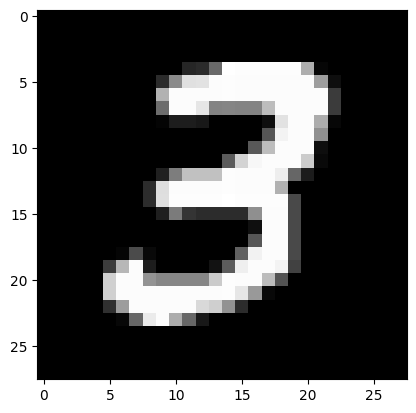

In [6]:
plt.imshow(train_images[7], cmap='grey')
train_labels[7]

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input images
model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (for each digit) and softmax activation


In [8]:
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd' or 'rmsprop'
              loss='categorical_crossentropy',  # For multi-class classification problems
              metrics=['accuracy'])


In [9]:
model.fit(train_images, hot_train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 [==============================] - 5s 5ms/step - loss: 0.3505 - accuracy: 0.9021 - val_loss: 0.1653 - val_accuracy: 0.9555
Epoch 2/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1604 - accuracy: 0.9546 - val_loss: 0.1234 - val_accuracy: 0.9668
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1160 - accuracy: 0.9666 - val_loss: 0.1036 - val_accuracy: 0.9727
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0917 - accuracy: 0.9737 - val_loss: 0.0950 - val_accuracy: 0.9747
Epoch 5/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0737 - accuracy: 0.9788 - val_loss: 0.0870 - val_accuracy: 0.9743
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0610 - accuracy: 0.9823 - val_loss: 0.0947 - val_accuracy: 0.9742
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.0841 - val_accuracy: 0.9757
Epoch 

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, hot_test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9771
Test Accuracy: 97.71%


In [11]:
img = np.expand_dims(test_images[7], axis=0)
print(model.predict(img))
test_labels[7]

1/1 [==============================] - 0s 227ms/step
[[4.6016485e-12 1.7120180e-06 5.3523607e-08 2.2945372e-02 5.5260994e-03
  2.6485197e-06 1.2176281e-12 1.1395374e-05 4.7313274e-06 9.7150797e-01]]


9

In [12]:
path = r'/home/frepa/Src/mnist/digits/frepa'
images = read_image_files(path)

In [13]:
images = adjust_images(images)

In [14]:
images = normalize_images(images)

1/1 [==============================] - 0s 34ms/step
6


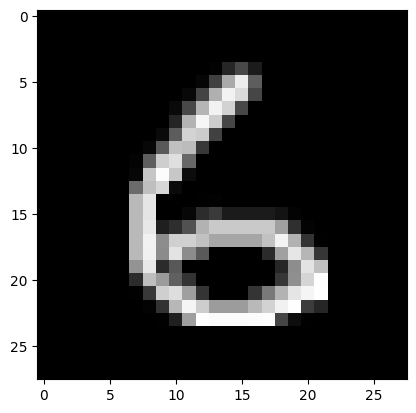

In [15]:
omg = images[9]
img = np.expand_dims(omg, axis=0)
print(np.argmax(model.predict(img)))
plot(omg)

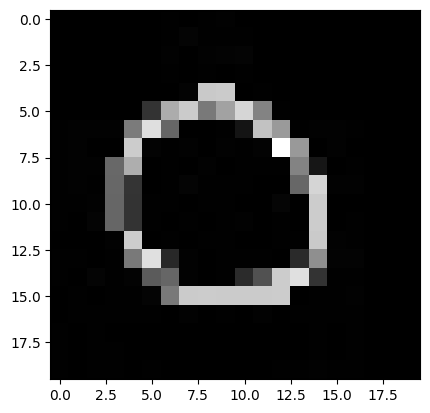

In [16]:
path = r'/home/frepa/Src/mnist/digits/pablo'
pimages = read_image_files(path)
iimages = invert(pimages)
plot(iimages[0])
s = reshape_20x20(iimages[0])
plot(s)


In [17]:
aimages = adjust_images(iimages)

In [18]:
nimages = normalize_images(aimages)

1/1 [==============================] - 0s 40ms/step


2


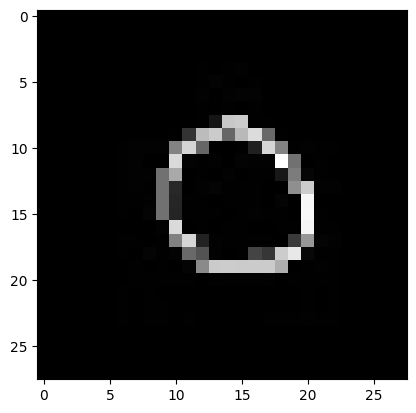

In [19]:
omg = nimages[0]
img = np.expand_dims(omg, axis=0)
print(np.argmax(model.predict(img)))
plot(omg)